### Generalized linear model: Bioassay + grid sampling (6 points)
In the bioassay example (Chapter 3 in the book), replace the uniform prior density by a joint normal prior distribution on $(\alpha,\beta)$, with $\alpha ∼ N(0,22)$, $\beta ∼ N(10,102)$, and $corr(\alpha,\beta) = 0.5$.

Hints
 * See demo3_6.m or demo3_6.py
 * Check that the range and spacing of grid for $\alpha$ and $\beta$ are sensible for the alternative prior
 * Compute the log-posterior in a grid
 * Scale the log-posterior by subtracting its maximum value before exponentiating
 * Exponentiate
 * Normalize the posterior
 * Use 2D grid sampling to sample from the posterior
 * In addition to the plots, report $p(\beta > 0|x, y)$
 * Useful Matlab functions: mnorm_lpdf.m, catrand.m, binsgeq.m

** a) Repeat all the computations and plots of Section 3.7 with this new prior distribution.**

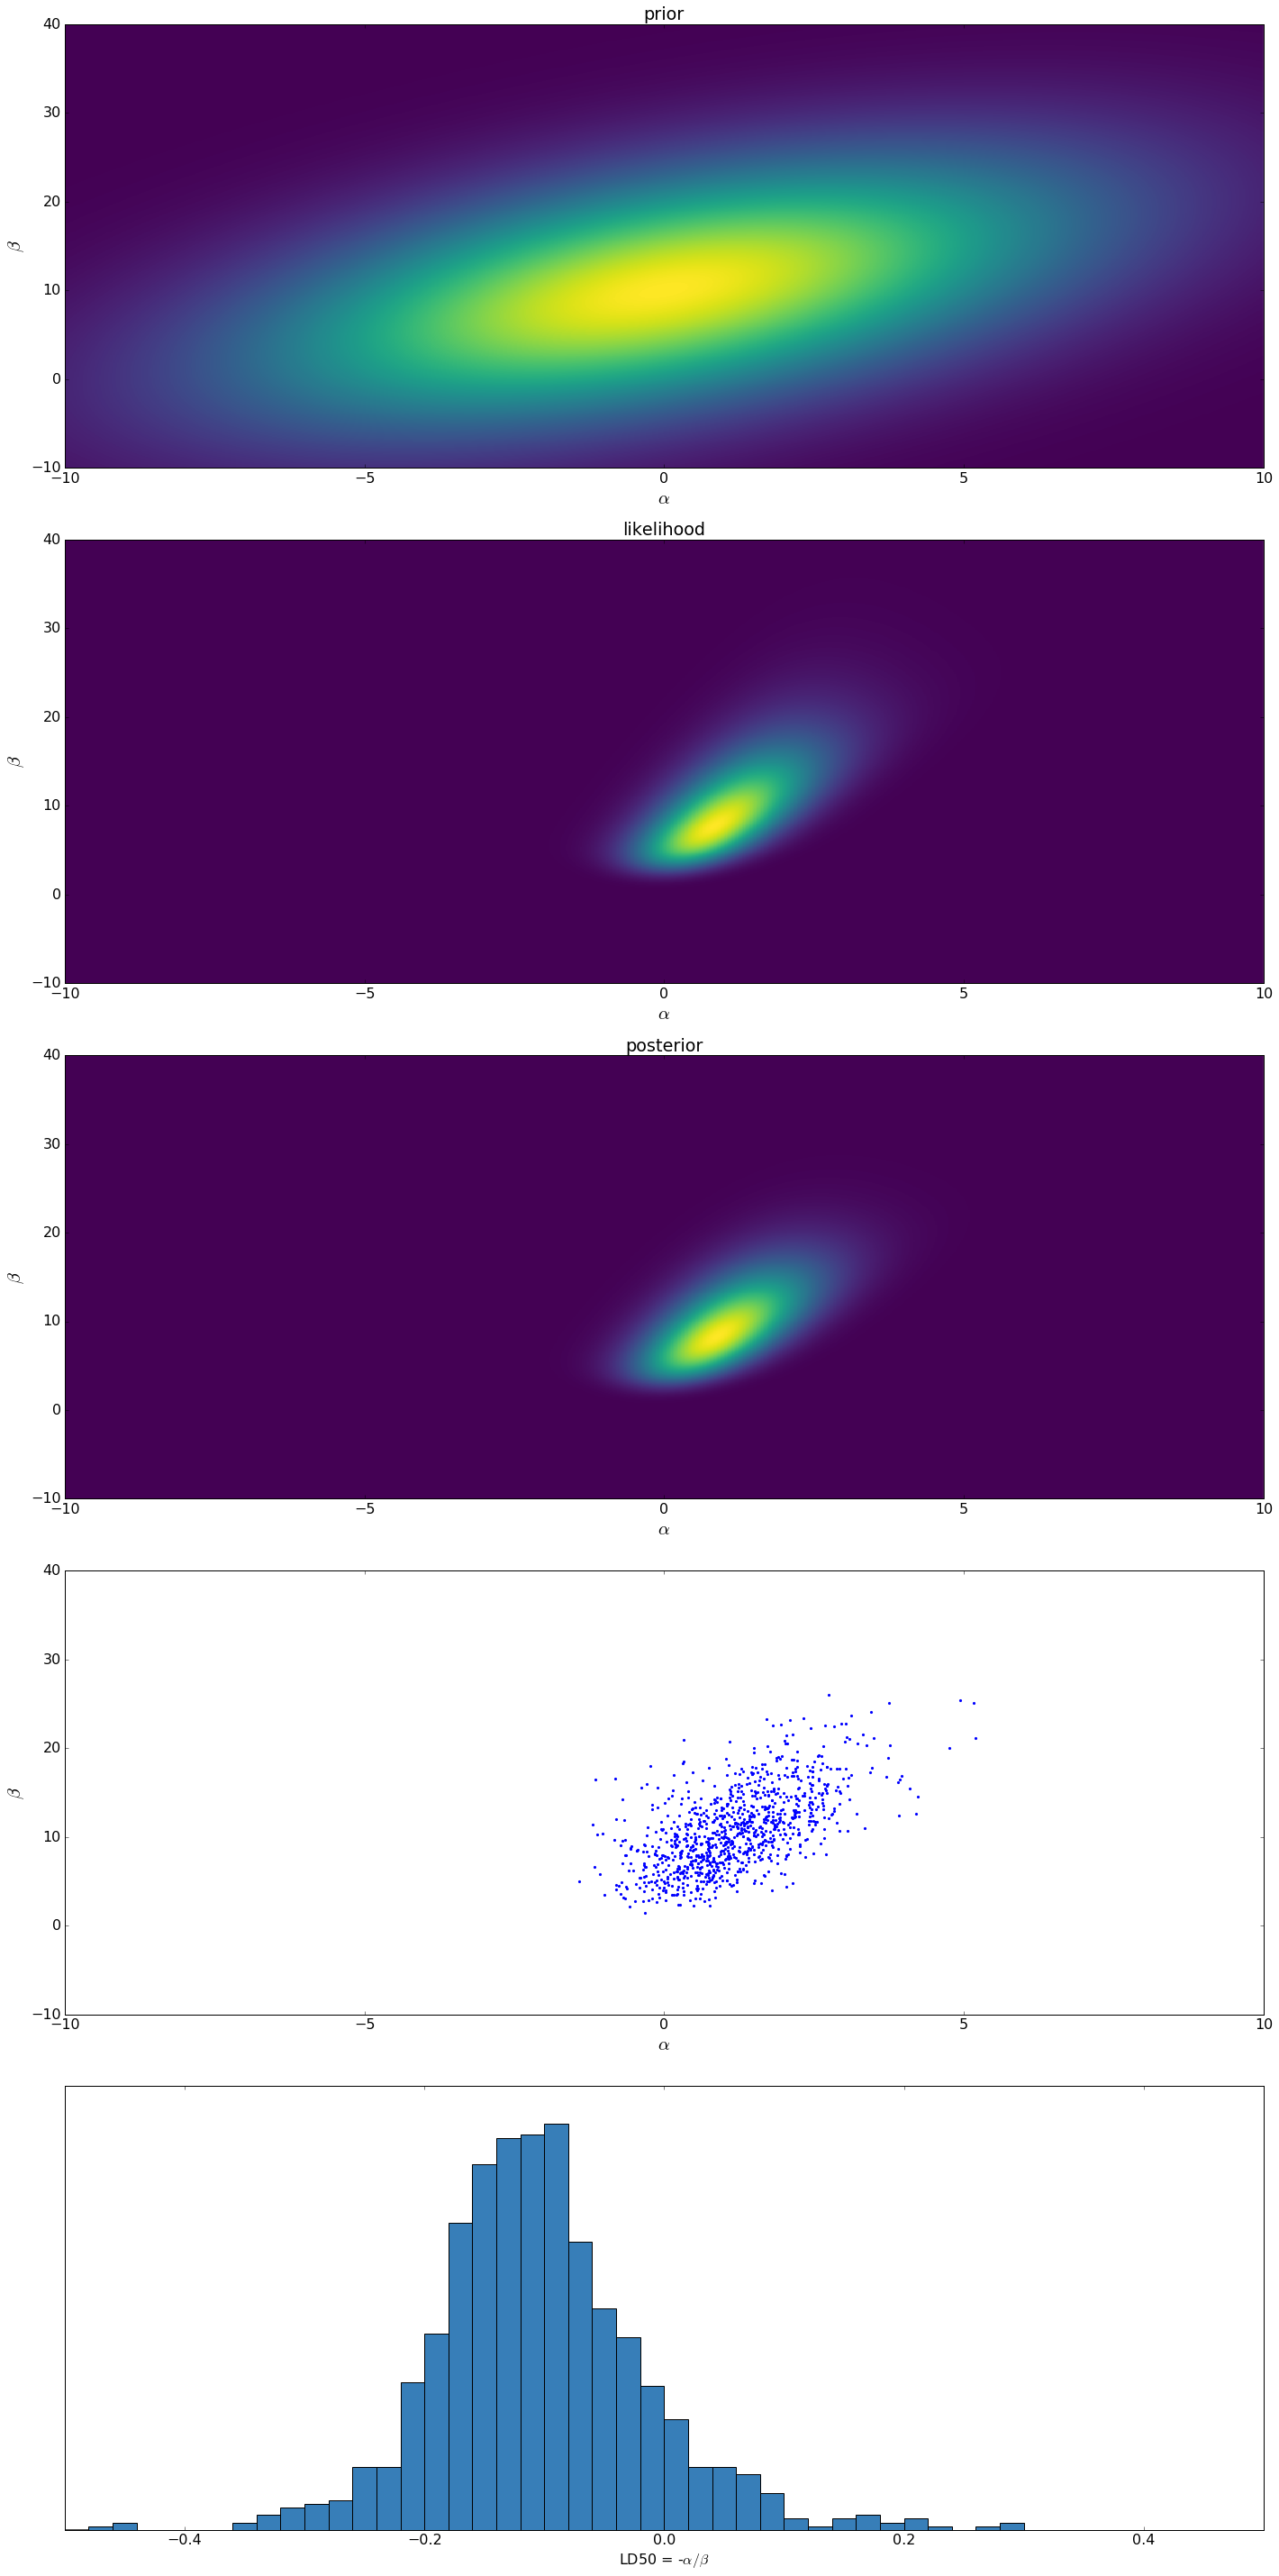

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import numpy as np

# Edit default plot settings (colours from colorbrewer2.org)
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=16)
plt.rc('lines', color='#377eb8', linewidth=2)
plt.set_cmap(plt.get_cmap('viridis'))

# data
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])

alpha_mean = 0
alpha_var = 22
beta_mean = 10
beta_var = 102
corr = 0.5
cov = np.sqrt(alpha_var) * np.sqrt(beta_var) * corr

N = 1000
A = np.linspace(-10, 10, N)
B = np.linspace(-10, 40, N)
AB = np.dstack(np.meshgrid(A, B))
prior = stats.multivariate_normal.pdf(AB, [alpha_mean, beta_mean], [[alpha_var, cov], [cov, beta_var]])

theta = 1 / (np.exp(-(A[:, None] + B[:, None, None] * x)) + 1)
loglike = np.sum(np.log(theta ** y * (1 - theta) ** (n - y)), axis=2)
logp = loglike + np.log(prior)
logp -= logp.max()
p = np.exp(logp)
p = p/np.sum(p)

# sample from the grid
nsamp = 1000
samp_indices = np.unravel_index(
    np.random.choice(p.size, size=nsamp, p=p.ravel()),
    p.shape
)
samp_A = A[samp_indices[1]]
samp_B = B[samp_indices[0]]
# add random jitter, see BDA3 p. 76
samp_A += (np.random.rand(nsamp) - 0.5) * (A[1] - A[0])
samp_B += (np.random.rand(nsamp) - 0.5) * (B[1] - B[0])

# samples of LD50 conditional beta > 0
bpi = samp_B > 0
samp_ld50 = -samp_A[bpi] / samp_B[bpi]

# ====== Plotting
plt.figure(figsize=(20, 40))

plt.subplot(5, 1, 1)
plt.imshow(prior, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), interpolation='none')
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.title('prior')

plt.subplot(5, 1, 2)
plt.imshow(np.exp(loglike), origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), interpolation='none')
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.title('likelihood')

plt.subplot(5, 1, 3)
plt.imshow(p, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), interpolation='none')
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.title('posterior')
    
# plot the samples
plt.subplot(5, 1, 4)
plt.scatter(samp_A, samp_B, 10, linewidth=0)
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)

# plot the histogram of LD50
plt.subplot(5, 1, 5)
plt.hist(samp_ld50, np.arange(-0.5, 0.51, 0.02))
plt.xlim([-0.5, 0.5])
plt.xlabel(r'LD50 = -$\alpha/\beta$', fontsize=16)
plt.yticks(())
plt.tight_layout()
plt.show()

**b) Check that your contour plot and scatterplot look like a compromise between the prior distribution and the likelihood (as displayed in Figure 3.3).**

**c) Discuss the effect of this hypothetical prior information on the conclusions in the applied context.**